# Dataset Information

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
%matplotlib inline

In [26]:
df=pd.read_csv('covid_dataset.csv')
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [27]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [28]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [41]:
df['Date']=pd.to_datetime(df['Date'])

In [42]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [30]:
datewise=df.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [31]:
datewise

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-05-22,5210817,2056643,338160
2020-05-23,5310362,2112185,342097
2020-05-24,5407613,2168563,345059


In [32]:
print('Basic Information')
print('Total noumber of conformed cases :',datewise['Confirmed'].iloc[-1])
print('Total number of recovered cases :',datewise['Recovered'].iloc[-1])
print('Total number of Deaths :',datewise['Deaths'].iloc[-1])
print('Total number of Active cases :',datewise['Confirmed'].iloc[-1]-datewise['Recovered'].iloc[-1]-datewise['Deaths'].iloc[-1])
print('Total number of closed cases :',datewise['Recovered'].iloc[-1]+datewise['Deaths'].iloc[-1])

Basic Information
Total noumber of conformed cases : 5589626
Total number of recovered cases : 2286956
Total number of Deaths : 350453
Total number of Active cases : 2952217
Total number of closed cases : 2637409


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text major ticklabel objects>)

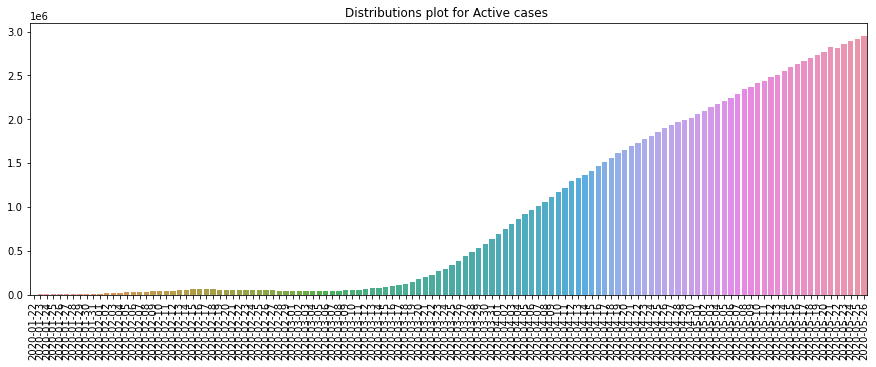

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Confirmed']-datewise['Recovered']-datewise['Deaths'])
plt.title('Distributions plot for Active cases ')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text major ticklabel objects>)

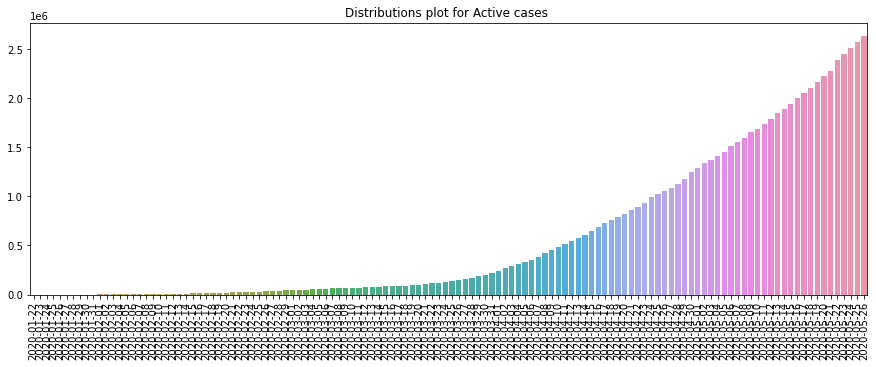

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Recovered']+datewise['Deaths'])
plt.title('Distributions plot for Active cases ')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different type of Cases')

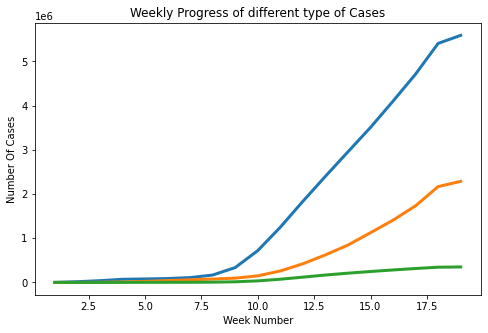

In [35]:
datewise['WeekofYear']=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise['WeekofYear'].unique()):
    weekwise_confirmed.append(datewise[datewise['WeekofYear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['WeekofYear']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['WeekofYear']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel('Week Number')
plt.ylabel('Number Of Cases')
plt.title('Weekly Progress of different type of Cases')

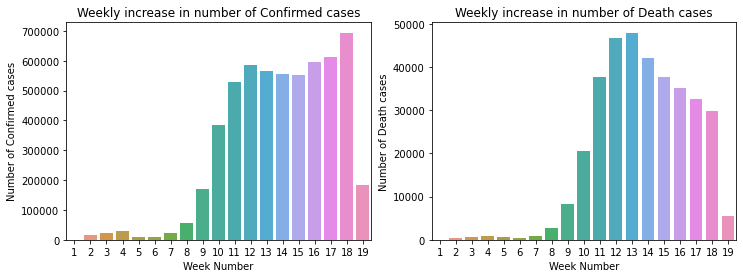

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax1.set_ylabel('Number of Confirmed cases')
ax2.set_ylabel('Number of Death cases')
ax1.set_title('Weekly increase in number of Confirmed cases')
ax2.set_title('Weekly increase in number of Death cases')
plt.show()

Average increase in number of Confirmed acses everyday: 44358.0
Average increase in number of Recovered acses everyday: 18150.0
Average increase in number of Death acses everyday: 2781.0


(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560., 737577.]),
 <a list of 9 Text major ticklabel objects>)

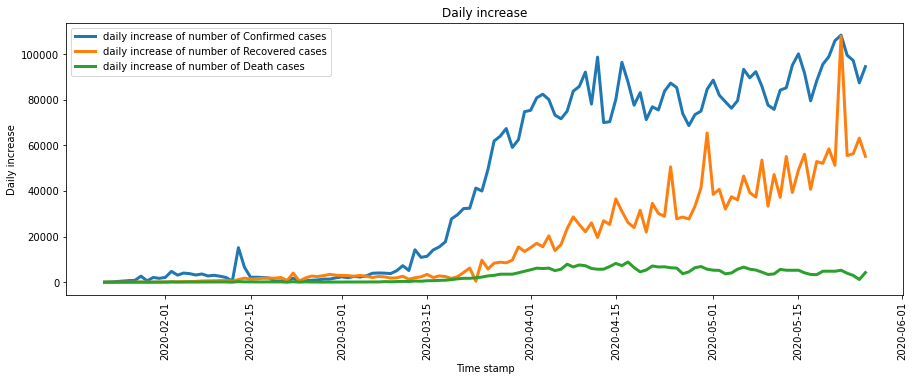

In [37]:
print('Average increase in number of Confirmed acses everyday:',np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of Recovered acses everyday:',np.round(datewise['Recovered'].diff().fillna(0).mean())) 
print('Average increase in number of Death acses everyday:',np.round(datewise['Deaths'].diff().fillna(0).mean()))  
 
plt.figure(figsize=(15,5))
plt.plot(datewise['Confirmed'].diff().fillna(0),label='daily increase of number of Confirmed cases',linewidth=3)
plt.plot(datewise['Recovered'].diff().fillna(0),label='daily increase of number of Recovered cases',linewidth=3)
plt.plot(datewise['Deaths'].diff().fillna(0),label='daily increase of number of Death cases',linewidth=3)
plt.xlabel('Time stamp')
plt.ylabel('Daily increase')
plt.title('Daily increase')
plt.legend()
plt.xticks(rotation=90)
      

In [38]:
#Country wise analysis
#calculating countrywise motality rate
countrywise = df[df['Date']==df['Date'].max()].groupby(['Country']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)
countrywise['Mortality']=(countrywise['Deaths']/countrywise['Confirmed'])*100
countrywise['Recovery']=(countrywise['Recovered']/countrywise['Confirmed'])*100



Text(0.5, 1.0, ' Top 15  countries as per Number of Death cases')

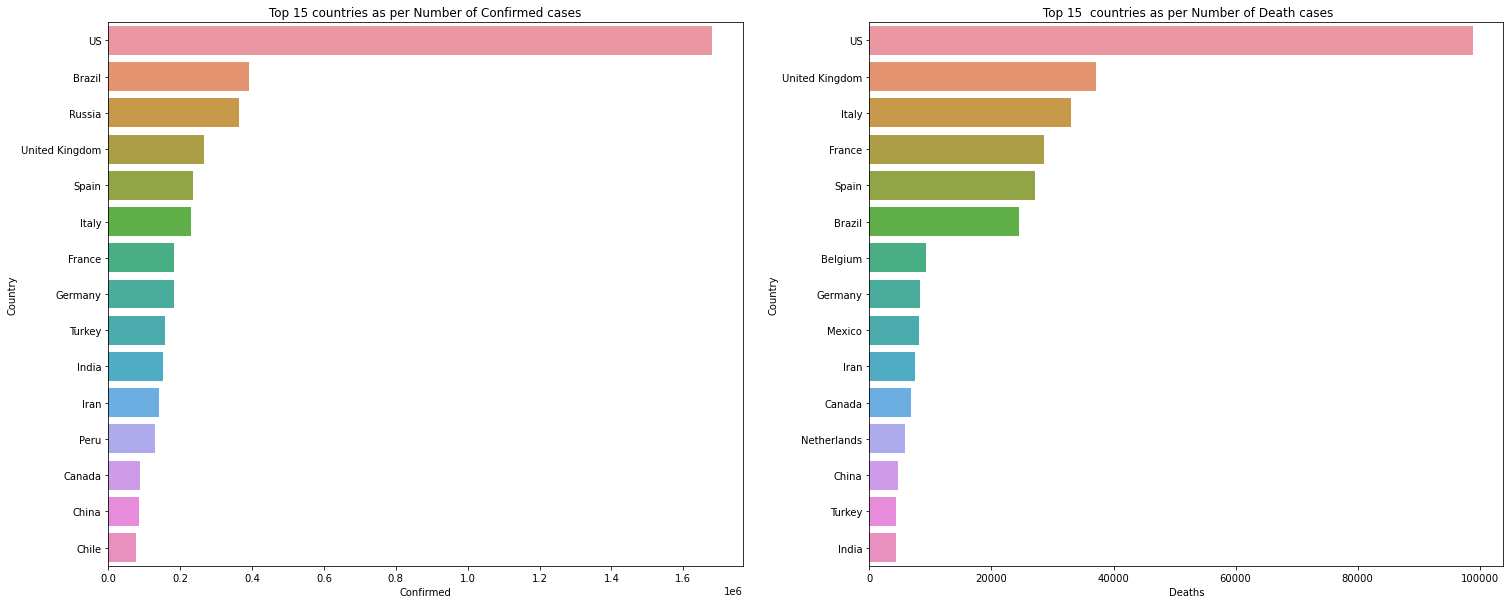

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(['Confirmed'],ascending=False).head(15)
top_15deaths=countrywise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top_15confirmed['Confirmed'],y=top_15confirmed.index,ax=ax1)
ax1.set_title(' Top 15 countries as per Number of Confirmed cases ')
sns.barplot(x=top_15deaths['Deaths'],y=top_15deaths.index,ax=ax2)
ax2.set_title(' Top 15  countries as per Number of Death cases')


In [44]:
#Data analysis for India
india_data= df[df['Country']=='India']
datewise_india=india_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print('Total Active cases',datewise_india['Confirmed'].iloc[-1]-datewise_india['Recovered'].iloc[-1]-datewise_india['Deaths'].iloc[-1])
print('Total Closed cases',datewise_india['Recovered'].iloc[-1]+datewise_india['Deaths'].iloc[-1])

Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total Active cases 82172
Total Closed cases 68621


In [45]:
#Data analysis for Italy
india_data= df[df['Country']=='Italy']
datewise_india=india_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print('Total Active cases',datewise_india['Confirmed'].iloc[-1]-datewise_india['Recovered'].iloc[-1]-datewise_india['Deaths'].iloc[-1])
print('Total Closed cases',datewise_india['Recovered'].iloc[-1]+datewise_india['Deaths'].iloc[-1])

Confirmed    230555
Recovered    144658
Deaths        32955
Name: 2020-05-26 00:00:00, dtype: int64
Total Active cases 52942
Total Closed cases 177613


In [46]:
#Data analysis for US
india_data= df[df['Country']=='US']
datewise_india=india_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print('Total Active cases',datewise_india['Confirmed'].iloc[-1]-datewise_india['Recovered'].iloc[-1]-datewise_india['Deaths'].iloc[-1])
print('Total Closed cases',datewise_india['Recovered'].iloc[-1]+datewise_india['Deaths'].iloc[-1])

Confirmed    1680913
Recovered     384902
Deaths         98913
Name: 2020-05-26 00:00:00, dtype: int64
Total Active cases 1197098
Total Closed cases 483815


Text(0.5, 1.0, 'Weekly Progress of different type of Cases')

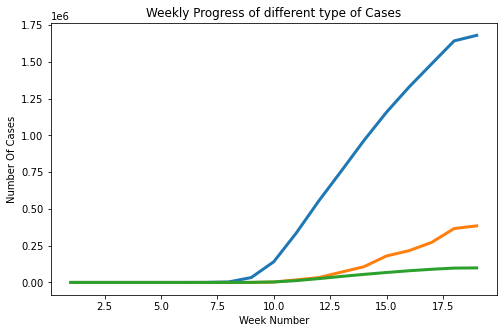

In [49]:
datewise_india['WeekofYear']=datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india['WeekofYear'].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india['WeekofYear']==i]['Confirmed'].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india['WeekofYear']==i]['Recovered'].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india['WeekofYear']==i]['Deaths'].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel('Week Number')
plt.ylabel('Number Of Cases')
plt.title('Weekly Progress of different type of Cases')

In [73]:
max_ind=datewise_india['Confirmed'].max()
China_data=df[df['Country']=='China']
Italy_data=df[df['Country']=='Italy']
US_data=df[df['Country']=='US']
Spain_data=df[df['Country']=='Spain']
datewise_China=China_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_Italy=Italy_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_US=US_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_Spain=Spain_data.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print('It took',datewise_india[datewise_india['Confirmed']>0].shape[0],'days in india to reach',max_ind,'confirmed cases')
print('It took',datewise_Italy[datewise_Italy['Confirmed']>0&(datewise_Italy['Confirmed']<=max_ind)].shape[0],'days in Italy to reach',max_ind,'confirmed cases')
print('It took',datewise_US[(datewise_US['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)].shape[0],'days in US to reach',max_ind,'confirmed cases')
print('It took',datewise_China[(datewise_China['Confirmed']>0)&(datewise_China['Confirmed']<=max_ind)].shape[0],'days in China to reach',max_ind,'confirmed cases')
print('It took',datewise_Spain[(datewise_Spain['Confirmed']>0)&(datewise_Spain['Confirmed']<=max_ind)].shape[0],'days in Spain to reach',max_ind,'confirmed cases')

It took 126 days in india to reach 1680913 confirmed cases
It took 117 days in Italy to reach 1680913 confirmed cases
It took 126 days in US to reach 1680913 confirmed cases
It took 126 days in China to reach 1680913 confirmed cases
It took 116 days in Spain to reach 1680913 confirmed cases


In [77]:
datewise['Days Since']= datewise.index-datewise.index[0]
datewise['Days Since']=datewise['Days Since'].dt.days
train_data=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_data=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [84]:
lin_reg=LinearRegression(normalize=True)
svm= SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))
svm.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [90]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid_data['Days Since']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_data['Days Since']).reshape(-1,1))


In [108]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1)))
    new_prediction_svm.append(svm.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1)))
pd.set_option('display.float_format',lambda x: '%.f'%x)
model_prediction=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=['Dates','LR','SVR'])
model_prediction.head(10)


,Dates,LR,SVR
0,2020-05-27,[[3992291.0187722547]],[6375101.168304623]
1,2020-05-28,[[4032855.000740635]],[6625485.609423377]
2,2020-05-29,[[4073418.9827090157]],[6883881.595678752]
3,2020-05-30,[[4113982.964677396]],[7150479.86627264]
4,2020-05-31,[[4154546.9466457767]],[7425474.164081515]
5,2020-06-01,[[4195110.928614157]],[7709061.259122623]
6,2020-06-02,[[4235674.910582538]],[8001440.972020209]
7,2020-06-03,[[4276238.892550918]],[8302816.197471698]
8,2020-06-04,[[4316802.874519299]],[8613392.927713929]
9,2020-06-05,[[4357366.856487679]],[8933380.275989348]


In [110]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[:int(datewise.shape[0]*0.85)]

In [115]:
lin_reg=LinearRegression(normalize=True)
svm= SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(model_train['Days Since']).reshape(-1,1),np.array(model_train['Confirmed']).reshape(-1,1))
svm.fit(np.array(model_train['Days Since']).reshape(-1,1),np.array(model_train['Confirmed']).reshape(-1,1))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [116]:
prediction_valid_lin_reg=lin_reg.predict(np.array(valid['Days Since']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid['Days Since']).reshape(-1,1))

In [117]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1)))
    new_prediction_svm.append(svm.predict(np.array(datewise['Days Since'].max()+i).reshape(-1,1)))
pd.set_option('display.float_format',lambda x: '%.f'%x)
model_prediction=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=['Dates','LR','SVR'])
model_prediction.head(10)


,Dates,LR,SVR
0,2020-05-27,[[3388304.795313387]],[9029744.567373995]
1,2020-05-28,[[3422073.1069378313]],[9390961.981270589]
2,2020-05-29,[[3455841.4185622754]],[9763737.260354951]
3,2020-05-30,[[3489609.7301867194]],[10148345.57476517]
4,2020-05-31,[[3523378.0418111635]],[10545066.427894054]
5,2020-06-01,[[3557146.3534356076]],[10954183.690242687]
6,2020-06-02,[[3590914.6650600517]],[11375985.633273978]
7,2020-06-03,[[3624682.976684496]],[11810764.963266205]
8,2020-06-04,[[3658451.28830894]],[12258818.855166582]
9,2020-06-05,[[3692219.599933384]],[12720448.98644481]
